In [33]:
import matplotlib.pyplot as plt
import pandas as pd

## Use `pandas` to Read in Data Files

#### The `stars_and_blends.csv` file contains a truth label and image data for thousands of images.<br><br>The first column is the label, while the following 100 columns are the image data. These 100 values correspond to the flux values for 100 pixels (which make up a 10 x 10 pixel image. Examples plotted below). <br><br>A label of `0` corresponds to a single star, while a label of `1` corresponds to a stellar blend (including both line-of-sight blends and stellar binaries. See the `stellar_blend_classification.pdf` for more info on the differences between the two classes).

In [34]:
# Read in the csv file with the labels and image data
data = pd.read_csv('../data/data-norm/max-only/raw_image_data.csv')
# data = pd.read_csv('../data/stars_and_blends.csv')

In [35]:
# Display the data
display(data)

,0.0,277.20334,282.9553,271.83322,284.41757,262.1559,264.75946,284.51016,273.57242,273.24265,...,271.7212,269.50912,283.30618,271.17114,284.95712,272.06622,269.96573,275.263,283.1734,280.687
0,0.0,145.99843,156.04462,152.71270,157.60016,161.58159,151.66408,146.48340,157.11702,151.11038,...,152.48366,146.63402,147.87310,150.63920,162.42668,139.83914,158.94525,156.54239,152.26909,155.73929
1,1.0,131.15047,134.07437,143.38974,151.23164,159.98980,160.54721,139.46558,138.15439,142.30998,...,134.23387,137.79636,146.86359,137.71599,147.27206,150.38734,147.89519,139.31274,118.66887,132.45900
2,0.0,6335.35800,6352.16940,6354.47850,6353.83450,6256.40230,6325.33700,6216.12200,6356.56050,6424.37300,...,6364.41500,6332.27150,6393.11200,6319.80370,6311.54300,6324.20200,6373.44630,6343.24500,6377.03200,6313.26200
3,0.0,235.03526,230.35857,231.11514,254.36690,235.79735,238.57712,234.95820,245.19000,236.46368,...,240.80603,235.60052,244.89456,235.74666,238.75406,234.23463,243.01349,255.27272,239.07870,228.23180
4,0.0,331.80533,325.91547,333.46704,327.21445,350.79266,343.17450,329.15625,347.57178,336.40048,...,326.28620,332.98860,321.08470,342.00085,334.79984,316.85100,319.58878,333.42838,345.64932,307.47223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27247,1.0,7706.11400,7690.42100,7786.46140,7730.99700,7739.15430,7767.03700,7742.50830,7683.13670,7770.76500,...,7715.26300,7684.23100,7739.31150,7729.17530,7675.14750,7690.13770,7778.65330,7718.55000,7746.91200,7679.95170
27248,1.0,498.44177,497.34982,486.47397,475.77295,508.89790,486.27905,490.55120,473.67470,460.53162,...,479.75897,500.60430,474.52975,491.23242,493.38380,493.15270,462.65945,487.43588,493.41937,480.53180
27249,0.0,141.12094,137.75162,152.11829,154.58861,141.78381,152.11327,153.46434,145.29085,141.48502,...,142.58968,134.54367,152.41508,147.32034,136.63080,144.55374,143.24600,148.83604,137.14203,144.89950
27250,1.0,310.22772,289.63620,288.96450,316.36346,305.37326,312.24530,334.11520,300.32500,290.85928,...,312.07650,297.64090,310.68220,315.53497,299.12590,304.21817,310.11288,311.64706,307.71738,307.95670


In [36]:
# Get the label data
label = data.iloc[:,0]

# Use .iloc to locate the image data within the DataFrame
image_data = data.iloc[:, 1:]


In [37]:
print("There are "+str(len(data[data.iloc[:,0]==0]))+' single stars in the dataset')
print("There are "+str(len(data[data.iloc[:,0]==1]))+' blended stars in the dataset')

There are 15109 single stars in the dataset
There are 12143 blended stars in the dataset


In [38]:
len(label)

27252

## Plot Images

#### Sometimes it is helpful to visualize an image you are working with, instead of staring at an array of flux values. Use the following code to plot an image. (The number in the brackets after iloc is the row in data that you are plotting).
Note: The images plotted in this notebook have no normalization applied to them. Once you normalize the data, try plotting again and see how the image has changed!

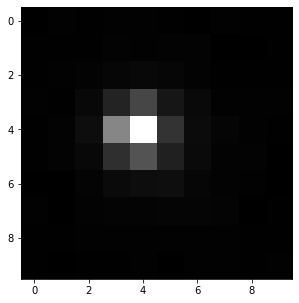

In [39]:
fig = plt.figure(figsize=(5,5))
plt.imshow(image_data.iloc[0].values.reshape(10,10), cmap='gray')
plt.show()

In [41]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.inspection import DecisionBoundaryDisplay
import umap

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

# KNeighborsClassifier 0.6862043661713447
# SVC 0.5730141258484682
# SVC 0.7052834342322509
# GaussianProcessClassifier
# DecisionTreeClassifier 0.6511649238671803
# RandomForestClassifier 0.6606127316088791
# MLPClassifier 0.6231884057971014
# AdaBoostClassifier 0.652357365620987
# GaussianNB 0.5719134103834159
# QuadraticDiscriminantAnalysis 0.5969546872133553

classifiers = [
    # KNeighborsClassifier(3),
    KNeighborsClassifier(5),
    # KNeighborsClassifier(10),
    # SVC(kernel="linear", C=0.025),
    # SVC(gamma=1, C=1),
    # SVC(gamma=2, C=1),
    # SVC(gamma=4, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    # AdaBoostClassifier(),
    # GaussianNB(),
    # QuadraticDiscriminantAnalysis(),
]

X, y = image_data, label
# X, y = data2.iloc[:,2:], label2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# reducer = umap.UMAP(min_dist=0,n_neighbors=100,n_components=20).fit(X_train, y=y_train)
# embedding_train = reducer.transform(X_train)
# embedding_test = reducer.transform(X_test)

# iterate over classifiers
# for name, clf in zip(names, classifiers):
#     # ax = plt.subplot(1, len(classifiers) + 1, i)
#     clf.fit(embedding_train, y_train)
#     score = clf.score(embedding_test, y_test)
#     print(clf.__class__.__name__, score)


for name, clf in zip(names, classifiers):
    # ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(clf.__class__.__name__, score)


KNeighborsClassifier 0.7206017244542285
DecisionTreeClassifier 0.6534580810860393
RandomForestClassifier 0.6563933223261786
MLPClassifier 0.42762795817281235
AdaBoostClassifier 0.6496055769583563
